In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
T = 1000
time_step = 0.1
time = np.arange(0,T, time_step)

membrane_time_constant = 20
V_rest = -65
V_threshold = -50
V_reset = -65

I_mean = 1.5
I_noise = 0.5

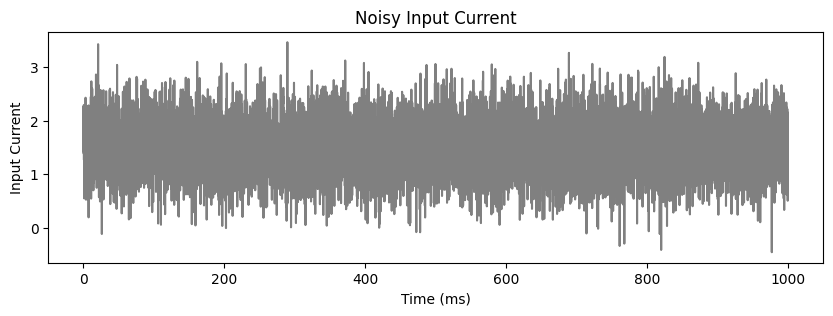

In [38]:
np.random.seed(42)

Current_over_time = I_mean + I_noise * np.random.randn(len(time))
plt.figure(figsize=(10, 3))
plt.plot(time, Current_over_time, color='gray')
plt.xlabel("Time (ms)")
plt.ylabel("Input Current")
plt.title("Noisy Input Current")
plt.show()

In [39]:
Voltage = np.zeros(len(time))
Voltage[0] = V_rest
spikes = []

for i in range (1, len(time)):
    dV = (-Voltage [i-1]-V_rest) + Current_over_time[i] / membrane_time_constant
    Voltage [i] = Voltage[i-1] + time_step * dV
    if Voltage[i] >= V_threshold:
        Voltage[i] = V_reset
        spikes.append(time[i])

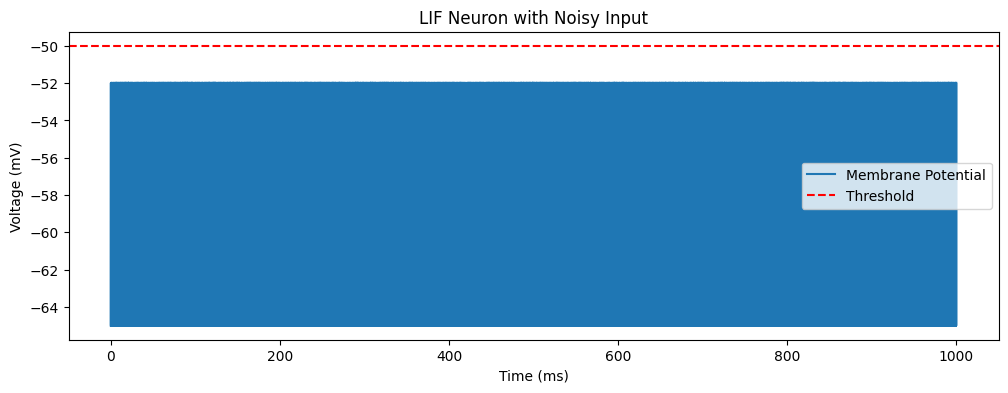

In [40]:
plt.figure(figsize=(12, 4))
plt.plot(time, Voltage, label="Membrane Potential")
plt.axhline(V_threshold, color='r', linestyle='--', label="Threshold")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.title("LIF Neuron with Noisy Input")
plt.legend()
plt.show()

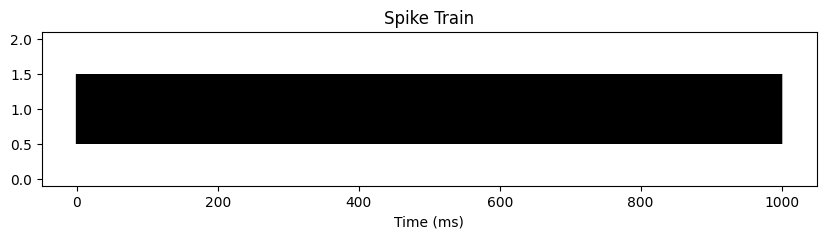

In [41]:
plt.figure(figsize=(10, 2))
plt.eventplot(spikes, colors='black')
plt.xlabel("Time (ms)")
plt.title("Spike Train")
plt.show()

In [42]:
T = 1000
firing_rate = len(spikes) / (T / 1000)
print(f"Firing rate: {firing_rate:.2f} Hz")

Firing rate: 4999.00 Hz


In [43]:
I_values = np.linspace(0.5, 3.0, 8)
rates = []

for I_mean in I_values:
    V = V_rest
    spike_count = 0
    
    for _ in range(len(time)):
        I = I_mean + I_noise * np.random.randn()
        dV = (-(V - V_rest) + I) / membrane_time_constant
        V += time_step * dV
        
        if V >= V_threshold:
            V = V_reset
            spike_count += 1
            
    rates.append(spike_count / (T / 1000))


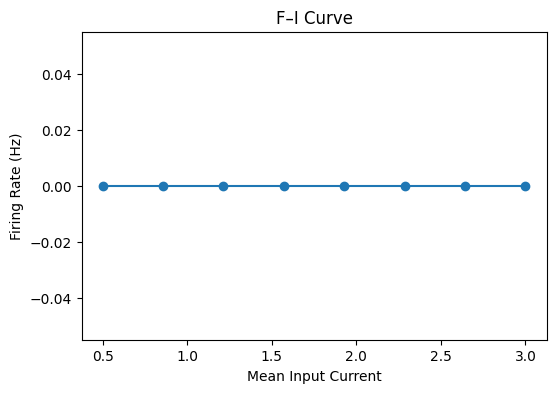

In [44]:
plt.figure(figsize=(6, 4))
plt.plot(I_values, rates, marker='o')
plt.xlabel("Mean Input Current")
plt.ylabel("Firing Rate (Hz)")
plt.title("F–I Curve")
plt.show()